In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LarsCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns

sns.set()

In [20]:
df= pd.read_csv(r'C:\Users\pbann\OneDrive\Desktop\science\data set\sugar.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


evry feature has equal importance and independent to each other son use naive bias

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
[df[df[feature]==0] for feature in df.columns]

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
 4              0      137             40             35      168  43.1                     2.288   33        1
 16             0      118             84             47      230  45.8                     0.551   31        1
 45             0      180             66             39        0  42.0                     1.893   25        1
 57             0      100             88             60      110  46.8                     0.962   31        0
 58             0      146             82              0        0  40.5                     1.781   44        0
 ..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
 713            0      134             58             20      291  26.4                     0.352   21        0
 727            0      141             84             26        0  32.4                     0.433   22  

In [40]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [43]:
q=df['Pregnancies'].quantile(0.98)
data_cleaned = df[df['Pregnancies']<q]
q=df['BMI'].quantile(0.99)
data_cleaned = df[df['BMI']<q]
q=df['SkinThickness'].quantile(0.99)
data_cleaned = df[df['SkinThickness']<q]
q=df['Insulin'].quantile(0.95)
data_cleaned = df[df['Insulin']<q]
q=df['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = df[df['DiabetesPedigreeFunction']<q]
q=df['Age'].quantile(0.99)
data_cleaned = df[df['Age']<q]


In [45]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

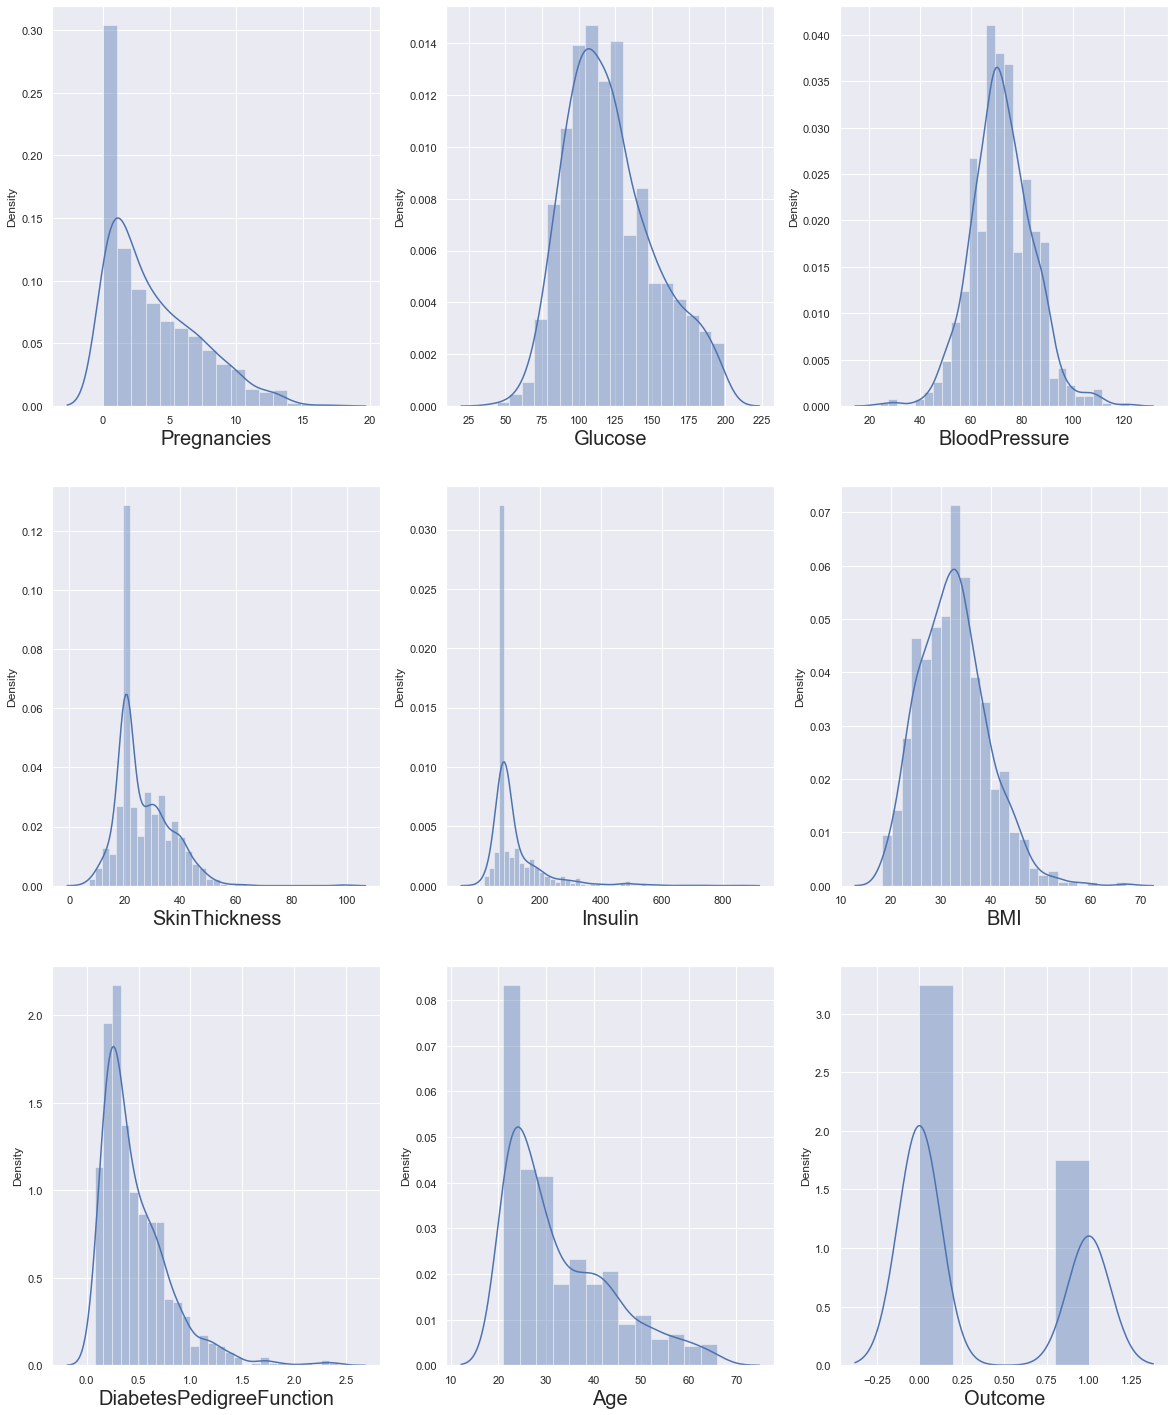

In [46]:
plt.figure(figsize=(20,25), facecolor='White')
plotnumber=1
for column in data_cleaned:
        if plotnumber<=9:
            ax=plt.subplot(3,3,plotnumber)
            sns.distplot(data_cleaned[column])
            plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()


In [47]:
X= df.drop(columns=['Outcome'])
y=df['Outcome']

In [48]:
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

In [49]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [50]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
vif                         # vif >5 it is multicolinearity

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=335)

In [52]:
from sklearn.naive_bayes import GaussianNB   # this is continuous data so gaussian naive bayes
model=GaussianNB()

In [54]:
model.fit(X_train,y_train)

GaussianNB()

In [55]:
import pickle
with open('model.sav','wb') as f:
    pickle.dump(model,f)
with open('standardScalar.sav','wb') as f:
    pickle.dump(scalar,f)


In [56]:
y_pred = model.predict(X_test)

In [57]:
print(accuracy_score(y_test,y_pred))

0.7552083333333334


In [58]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[103,  19],
       [ 28,  42]], dtype=int64)

In [59]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [62]:
accuracy = (tp+tn)/(tp+fp+fn+tn)
accuracy

0.7552083333333334

In [64]:
precision = tp/(tp+fp)
precision

0.8442622950819673

In [65]:
recall=tp/(tp+fn)   # out of total positive how many identified positive
recall

0.7862595419847328

In [68]:
f1_score= 2*(recall*precision)/(recall+precision)
f1_score

0.8142292490118578

In [69]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7221311475409836

In [70]:
fpr,tpr,tresholds=roc_curve(y_test,y_pred)

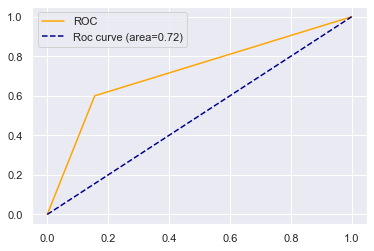

In [71]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Roc curve (area=%0.2f)'% auc)
plt.legend()
plt.show()